In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
plt.style.use("seaborn")

C:\Users\Hp\AppData\Local\Temp\ipykernel_36308\2218963324.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [29]:
# Taking the data from csv file using .read_csv
data = pd.read_csv("Linear_Regression.csv")

In [30]:

data.head()

,X,Y
0,1,3.888889
1,2,4.555556
2,3,5.222222
3,4,5.888889
4,5,6.555556


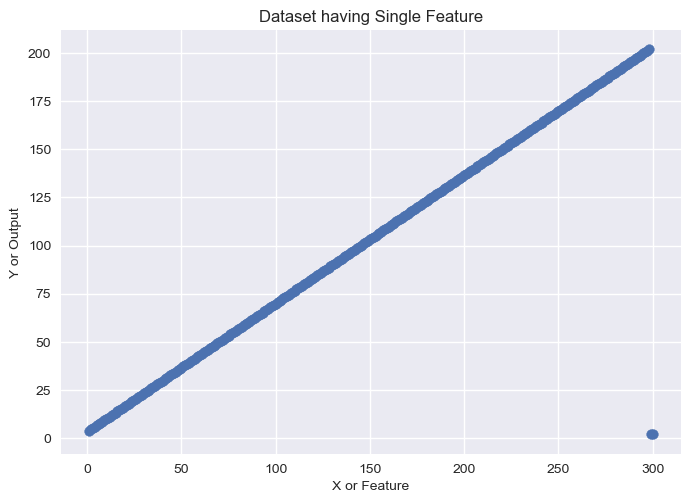

In [31]:
# Ploting the Data 
plt.title("Dataset having Single Feature")
plt.xlabel("X or Feature")
plt.ylabel("Y or Output")
plt.scatter(data["X"] , data["Y"])
plt.show()

In [32]:
X = data["X"]       #here X is the feature or input
y = data["Y"]       # here y is the label our output

print(X)
print(y)

0        1
1        2
2        3
3        4
4        5
      ... 
295    296
296    297
297    298
298    299
299    300
Name: X, Length: 300, dtype: int64
0        3.888889
1        4.555556
2        5.222222
3        5.888889
4        6.555556
          ...    
295    200.555556
296    201.222222
297    201.888889
298      1.888889
299      1.888889
Name: Y, Length: 300, dtype: float64


In [33]:
# Now dividing the dataset
def traintestsplit(X , y , split = 0.8):
        m = X.shape[0]
        data1 = np.zeros((m , 2))
        data1[: , 0] = X
        data1[: , 1] = y
        np.random.shuffle(data1)
        Split = int(m*split)
        Xtrain = data1[:Split ,0]    #  Training Feature
        ytrain = data1[:Split , 1]   #  Training Output
        Xtest = data1[Split:,0]      #  Testing Feature
        ytest = data1[Split:,1]      #  Testing Output
        
        return Xtrain , ytrain , Xtest , ytest
        
        
        

In [34]:
Xtrain , ytrain , Xtest , ytest = traintestsplit(X,y)

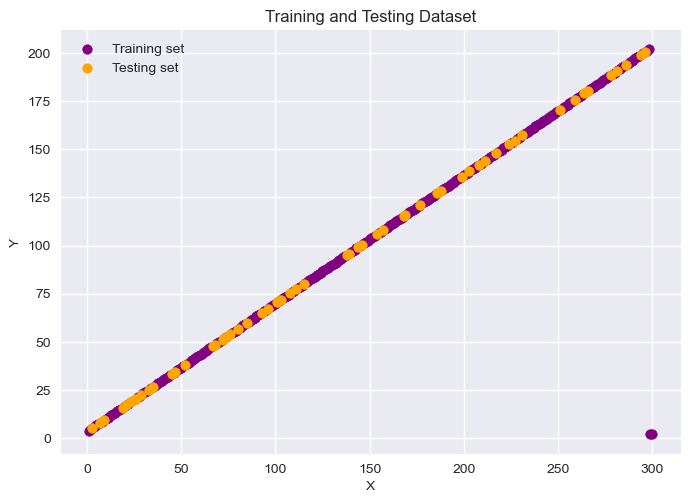

In [35]:
plt.title("Training and Testing Dataset")
plt.xlabel("X")
plt.ylabel("Y")
plt.scatter(Xtrain , ytrain , label="Training set" , color = "purple")
plt.scatter(Xtest , ytest , label = "Testing set" , color = "orange" )
plt.legend()
plt.show()

In [36]:
# Now Making a hypothesis function
def hypothesis(X , theta):
    
    """This Function assumes a hypothesis function as we are making Linear Regression model so our equation will be like y = w*x + b or y = theta[0]*x + theta[1], where theta is called parameters."""
    return theta[0]*X + theta[1]
# Making the cost function
def costfunction(X , y , theta):
    """Cost Function is used to check how good the Model working.There are various types of Cost function here we are using Squared function cost function."""
    m = X.shape[0]
    e = 0
    for i in range(m):
        y_i = hypothesis(X[i] , theta)
        e = e + (y[i] - y_i)**2
    
    return e/(2*m)

#error = costfunction(X,y,theta)
# Finding derivative function which is the derivative of cost function
def derivative(X,y,theta):
    
    n = 0.1
    m = X.shape[0]
    derive = np.zeros((2,))
    
    for i in range(m):
        exp = hypothesis(X[i] , theta) - y[i]
        derive[0] = exp*X[i]
        derive[1] = exp
        
        return derive/m
    
    

# Now training the model

def trainmodel(X , y, alpha= 0.125):
    """This function train the model and find out the best value of parameters(theta) for the function. here alpha is learning rate and whose value is choosen by plotting graphs of cost function on various type of alpha"""
    
    theta = np.zeros((2,))
    
    error_list = []
    for i in range(530) :
        derive = derivative(X,y,theta)
        
        error = costfunction(X,y,theta)
        error_list.append(error)
        theta[0] = theta[0] - alpha*derive[0]
        theta[1] = theta[1] - alpha*derive[1]
    plt.plot(error_list)   
    return theta
        
    
def predict(X , theta):
    """Used for making predictions"""
    
    return hypothesis(X , theta)
        
    
    
    

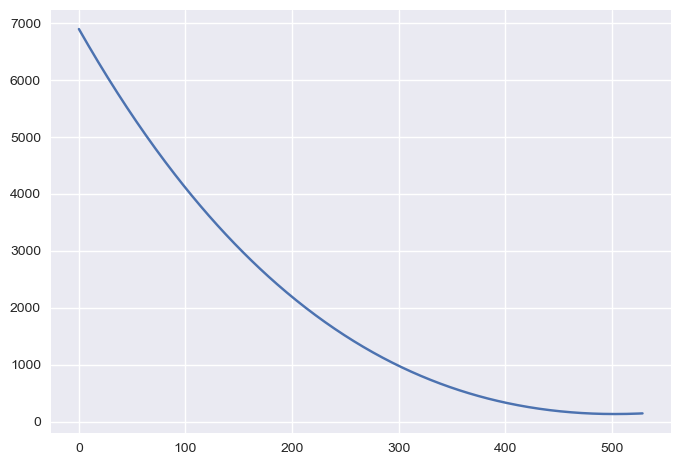

In [37]:
train1 = trainmodel(X ,y)

In [38]:
# Now testing the model by gving the testing feature and theta but not its corresponding y
y_predict = predict(Xtest , train1)
print(y_predict)

[ 20.83401    131.25426297  70.83563398 156.25507497 141.67126797
 102.08664898  65.27989799 130.55979597 195.83969396 161.11634396
  33.33441599 118.05938997  72.22456798   2.777868   107.64238498
  77.78030398   5.555736    96.53091298 204.86776495 123.61512597
  23.61187799 100.69771498  47.91822299  67.36329898 151.39380597
 206.25669895  56.25182699  25.00081199  16.667208    18.056142
 193.75629296 158.33847596  75.69690298 147.22700397 129.86532897
 117.36492297 184.72822196 109.72578598  80.55817198 175.00568396
  15.278274    31.94548199  59.72416199 199.31202896  50.69609099
   6.94467     47.22375599  18.750609   180.56141996  36.80675099
 185.42268896 145.14360297  53.47395899  52.77949199 138.89339997
  97.22537998  51.39055799 184.03375496  13.88934     17.361675  ]


In [39]:
# Putting Data in organised format
pd.DataFrame(y_predict)

,0
0,20.834010
1,131.254263
2,70.835634
3,156.255075
4,141.671268
5,102.086649
6,65.279898
7,130.559796
8,195.839694
9,161.116344


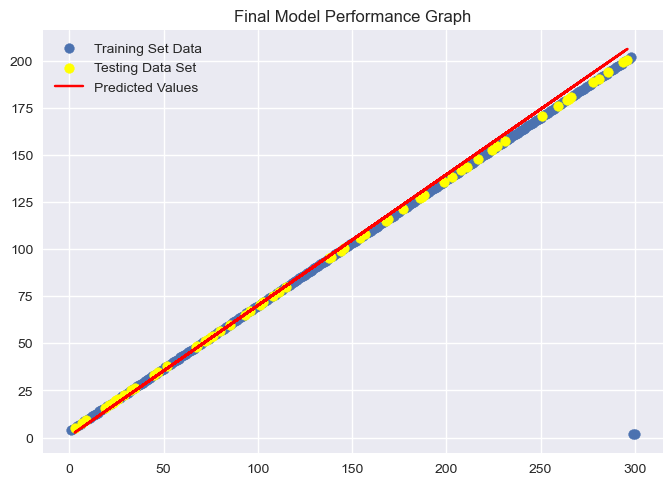

In [40]:
# Plotting the Final model

plt.title("Final Model Performance Graph")
plt.scatter(Xtrain , ytrain , label = "Training Set Data")
plt.scatter(Xtest , ytest , label = "Testing Data Set" , color = "yellow")
plt.plot(Xtest , y_predict , label = "Predicted Values" , color = "red")
plt.legend()

plt.show()


In [41]:
# Model Evaluation

def evaluation(y , y_predict):
    """This function checks how well the model perform. If the evalutaion value came close to 1 it means it performs very well. this is also called as R2square"""
    ymean = y.mean()
    num = np.sum((y - y_predict)**2)
    denom = np.sum((y - ymean)**2)
    
    return 1 - num/denom

In [42]:
evaluation(ytest , y_predict)

0.9978248776583932

In [43]:
# Table of actual values and predicted values
New_data = pd.DataFrame(ytest , y_predict)
print(New_data)

                     0
20.834010    22.555556
131.254263  128.555556
70.835634    70.555556
156.255075  152.555556
141.671268  138.555556
102.086649  100.555556
65.279898    65.222222
130.559796  127.888889
195.839694  190.555556
161.116344  157.222222
33.334416    34.555556
118.059390  115.888889
72.224568    71.888889
2.777868      5.222222
107.642385  105.888889
77.780304    77.222222
5.555736      7.888889
96.530913    95.222222
204.867765  199.222222
123.615126  121.222222
23.611878    25.222222
100.697715   99.222222
47.918223    48.555556
67.363299    67.222222
151.393806  147.888889
206.256699  200.555556
56.251827    56.555556
25.000812    26.555556
16.667208    18.555556
18.056142    19.888889
193.756293  188.555556
158.338476  154.555556
75.696903    75.222222
147.227004  143.888889
129.865329  127.222222
117.364923  115.222222
184.728222  179.888889
109.725786  107.888889
80.558172    79.888889
175.005684  170.555556
15.278274    17.222222
31.945482    33.222222
59.724162  